# **Import Libary**

In [1]:
import matplotlib.pyplot as plt
import cv2

# **Load Image**

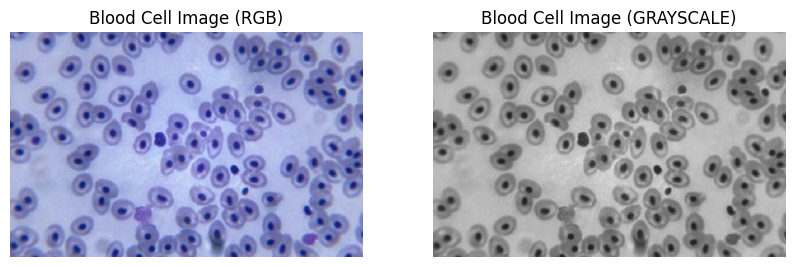

True

In [2]:
ori_img = cv2.imread('image/bloodcell.bmp')
gray_img = cv2.imread('image/bloodcell.bmp',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ori_img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blood Cell Image (RGB)')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Blood Cell Image (GRAYSCALE)')

plt.show()

# Save file .png on gray image
cv2.imwrite('image/bloodcell_gray.png',gray_img)

# **Process Image**

## **Convert to HSV**

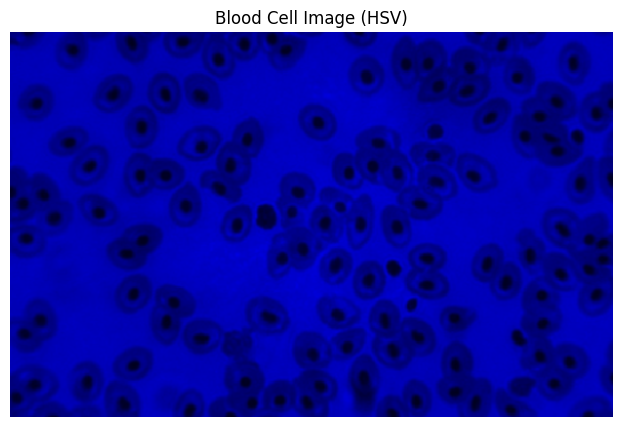

In [9]:
ngray_img = cv2.imread('image/bloodcell_gray.png')
hsv_img = cv2.cvtColor(ngray_img,cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10, 5))
plt.title('Blood Cell Image (HSV)')
plt.imshow(hsv_img)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Center of cell detect')

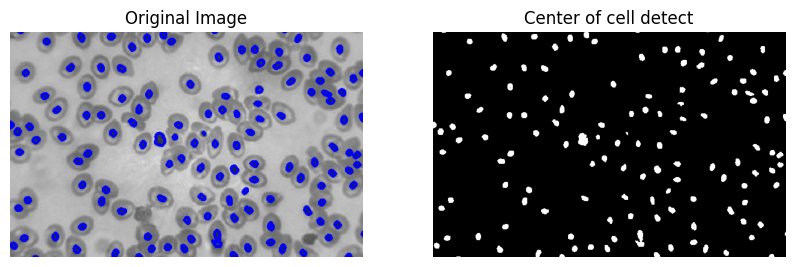

In [6]:
# lower range in HSV
lower_range = (0, 0, 30)
# upper rangein HSV
upper_range = (0, 0, 75)

# detect center of cell by color
mask = cv2.inRange(hsv_img, lower_range, upper_range)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ngray_img,cmap = 'gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask,cmap = 'gray')
plt.axis('off')
plt.title('Center of cell detect')

False

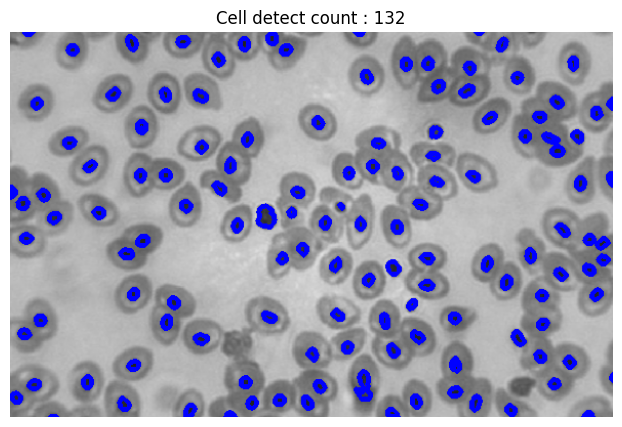

In [7]:
# find contouts in picture
contours,h = cv2.findContours(mask,1,2)

cell_count = 0

for cnt in contours:
    if cv2.contourArea(cnt) < 1000: 
        cv2.drawContours(ngray_img,[cnt],-1,(0,0,255),3)
        cell_count +=1

plt.figure(figsize=(10, 5))
plt.imshow(ngray_img,cmap = 'gray')
plt.axis('off')
plt.title(f'Cell detect count : {cell_count}')

cv2.imwrite('pic/BloodCellDection.png',ngray_img)